In [1]:
import numpy as np
class NeuralNetwork:
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.activation = activation

    def feed_forward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.apply_activation(np.dot(w, a) + b)
        return a

    def apply_activation(self, z):
        if self.activation == 'sigmoid':
            return sigmoid(z)
        elif self.activation == 'relu':
            return relu(z)
        elif self.activation == 'tanh':
            return tanh(z)
        else:
            raise ValueError('Unknown activation function: ' + self.activation)

    def apply_activation_prime(self, z):
        if self.activation == 'sigmoid':
            return sigmoid_prime(z)
        elif self.activation == 'relu':
            return relu_prime(z)
        elif self.activation == 'tanh':
            return tanh_prime(z)
        else:
            raise ValueError('Unknown activation function: ' + self.activation)

    # feed backward to update NN paremeters
    def feed_backward(self,x,y):
        delta_b = [np.zeros(b.shape) for b in self.biases]
        delta_w = [np.zeros(w.shape) for w in self.weights]
        #activations of input layer
        activation = np.transpose(x)
        activations = [activation]
        # input after input layer
        layer_input = []
        #forward to get each layer’s input and output
        for b, w in zip(self.biases,self.weights):
            z = np.dot(w,activation) + b
            layer_input.append(z) #input of each layer
            activation = sigmoid(z)
            activations.append(activation)#output of each layer
        #loss funtion
        ground_truth = np.transpose(y)
        diff = activations[-1] - ground_truth
        #get input of last layer
        last_layer_input = layer_input[-1]
        delta = np.multiply(diff,sigmoid_prime(last_layer_input))
        #bias update of last layer
        delta_b[-1] = np.sum(delta,axis=1,keepdims=True)
        #weight update of last layer
        delta_w[-1] = np.dot(delta, np.transpose(activations[-2]))
        #update weights and bias from 2nd layer to last layer
        for i in range(2,self.num_layers):
            input_values = layer_input[-i]
            delta = np.multiply(np.dot(np.transpose(self.weights[-i+1]),delta),sigmoid_prime(input_values))
            delta_b[-i] = np.sum(delta,axis=1,keepdims=True)
            delta_w[-i] = np.dot(delta,np.transpose(activations[-i-1]))
        return delta_b,delta_w
    #training using BP
    def fit(self, x,y,learnrate,mini_batch_size, epochs=1000):
        n = len(x)#training size
        accuracy_history = []
        for i in range(epochs):
            randomlist = np.random.randint(0,n-mini_batch_size,int(n/mini_batch_size))
            batch_x = [x[k:k+mini_batch_size] for k in randomlist]
            batch_y = [y[k:k+mini_batch_size] for k in randomlist]
            for j in range(len(batch_x)):
                delta_b,delta_w = self.feed_backward(batch_x[j], batch_y[j])
                self.weights = [w - (learnrate/mini_batch_size)*dw for w, dw in
                                zip(self.weights,delta_w)]
                self.biases = [b - (learnrate/mini_batch_size)*db for b, db in
                               zip(self.biases,delta_b)]
            if (i+1)%100 == 0:
                labels = self.predict(x)
                acc = 0.0
                for k in range(len(labels)):
                    if y[k,labels[k]]==1.0:
                        acc += 1.0
                acc=acc/len(labels)
                accuracy_history.append(acc)
                print("iterations %d accuracy %.3f"%(i+1,acc))
        return accuracy_history
    #predict function
    def predict(self, x):
        results = self.feed_forward(x.T)
        labels = [np.argmax(results[:,y]) for y in range(results.shape[1])]
        return labels

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return (z > 0).astype(float)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1.0 - np.tanh(z)**2


In [2]:
#实践部分
import struct
import os
#fucntion to load MNIST data
def load_mnist_data(path,kind='train'):
    label_path = os.path.join(path, '%s-labels.idx1-ubyte'%kind)
    image_path = os.path.join(path, '%s-images.idx3-ubyte'%kind)
    with open(label_path,'rb') as lbpath: # open label file
        struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(image_path,'rb') as imgpath:# open image file
        struct.unpack('>IIII', imgpath.read(16))
        #transform image into 784-dimensional feature vector
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

#定义图片显示函数
import matplotlib.pyplot as plt
def show_image(image):
    plt.figure()
    img = image.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()
#数据读取和预处理
from sklearn.preprocessing import StandardScaler
path = 'MNIST'
train_images, train_labels = load_mnist_data(path,kind='train')
# show_image(train_images)
train_y = np.zeros((len(train_labels),10))
for i in range(len(train_labels)):
    train_y[i,train_labels[i]]=1
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_images, test_labels = load_mnist_data(path,kind='t10k')
# show_image(test_images)
test_y = np.zeros((len(test_labels),10))
for i in range(len(test_labels)):
    test_y[i,test_labels[i]]=1
test_x = scaler.fit_transform(test_images)


## 三层神经网络+sigmoid

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.329
iterations 200 accuracy 0.462
iterations 300 accuracy 0.617
iterations 400 accuracy 0.678
iterations 500 accuracy 0.713
iterations 600 accuracy 0.734
iterations 700 accuracy 0.747
iterations 800 accuracy 0.756
iterations 900 accuracy 0.763
iterations 1000 accuracy 0.768
iterations 1100 accuracy 0.773
iterations 1200 accuracy 0.777
iterations 1300 accuracy 0.780
iterations 1400 accuracy 0.783
iterations 1500 accuracy 0.785
iterations 1600 accuracy 0.787
iterations 1700 accuracy 0.790
iterations 1800 accuracy 0.792
iterations 1900 accuracy 0.794
iterations 2000 accuracy 0.796
test accuracy:0.772


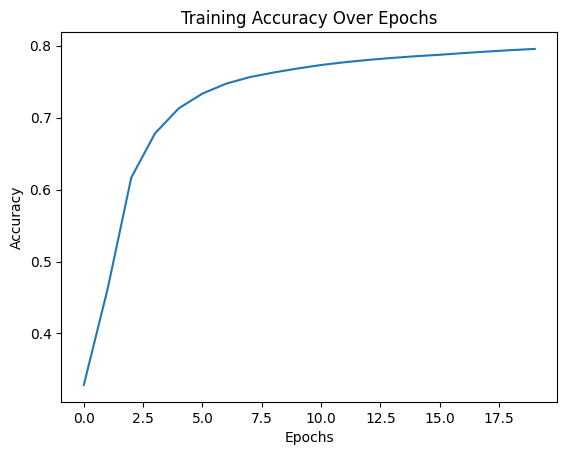

In [3]:
#构建模型
layer_sizes = [784, 128, 10]
NN = NeuralNetwork(layer_sizes)
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 四层神经网络+sigmoid

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.231
iterations 200 accuracy 0.411
iterations 300 accuracy 0.504
iterations 400 accuracy 0.628
iterations 500 accuracy 0.661
iterations 600 accuracy 0.677
iterations 700 accuracy 0.693
iterations 800 accuracy 0.768
iterations 900 accuracy 0.784
iterations 1000 accuracy 0.793
iterations 1100 accuracy 0.799
iterations 1200 accuracy 0.805
iterations 1300 accuracy 0.810
iterations 1400 accuracy 0.814
iterations 1500 accuracy 0.817
iterations 1600 accuracy 0.821
iterations 1700 accuracy 0.824
iterations 1800 accuracy 0.826
iterations 1900 accuracy 0.829
iterations 2000 accuracy 0.831
test accuracy:0.798


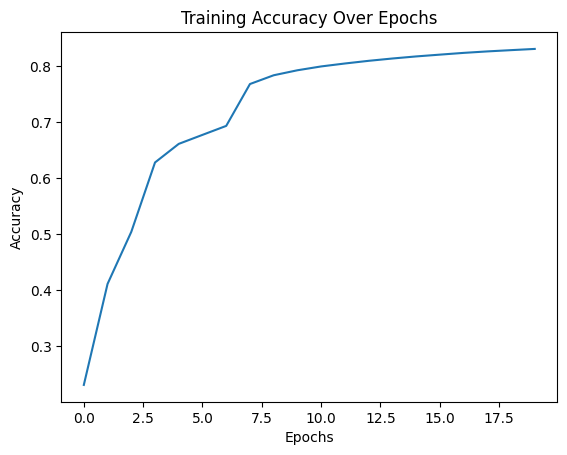

In [4]:
#构建模型
layer_sizes = [784, 128, 64 , 10]
NN = NeuralNetwork(layer_sizes)
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 五层神经网络+sigmoid

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.512
iterations 200 accuracy 0.682
iterations 300 accuracy 0.760
iterations 400 accuracy 0.805
iterations 500 accuracy 0.833
iterations 600 accuracy 0.852
iterations 700 accuracy 0.866
iterations 800 accuracy 0.877
iterations 900 accuracy 0.887
iterations 1000 accuracy 0.894
iterations 1100 accuracy 0.900
iterations 1200 accuracy 0.906
iterations 1300 accuracy 0.910
iterations 1400 accuracy 0.914
iterations 1500 accuracy 0.918
iterations 1600 accuracy 0.922
iterations 1700 accuracy 0.925
iterations 1800 accuracy 0.928
iterations 1900 accuracy 0.930
iterations 2000 accuracy 0.932
test accuracy:0.882


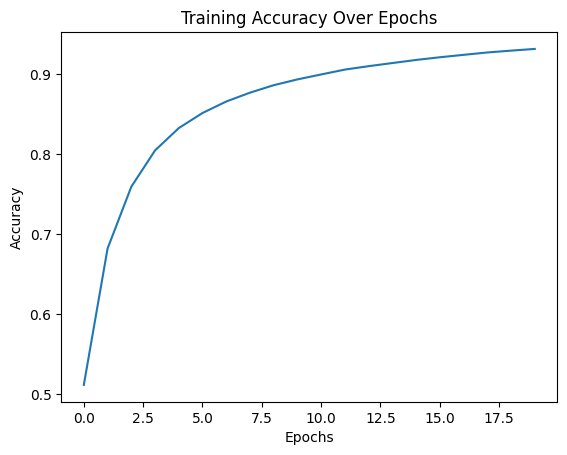

In [5]:
#构建模型
layer_sizes = [784, 128, 64 ,32, 10]
NN = NeuralNetwork(layer_sizes)
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 四层神经网络+sigmoid激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.353
iterations 200 accuracy 0.555
iterations 300 accuracy 0.646
iterations 400 accuracy 0.720
iterations 500 accuracy 0.749
iterations 600 accuracy 0.766
iterations 700 accuracy 0.778
iterations 800 accuracy 0.787
iterations 900 accuracy 0.795
iterations 1000 accuracy 0.801
iterations 1100 accuracy 0.806
iterations 1200 accuracy 0.810
iterations 1300 accuracy 0.813
iterations 1400 accuracy 0.817
iterations 1500 accuracy 0.820
iterations 1600 accuracy 0.823
iterations 1700 accuracy 0.825
iterations 1800 accuracy 0.827
iterations 1900 accuracy 0.830
iterations 2000 accuracy 0.831
test accuracy:0.804


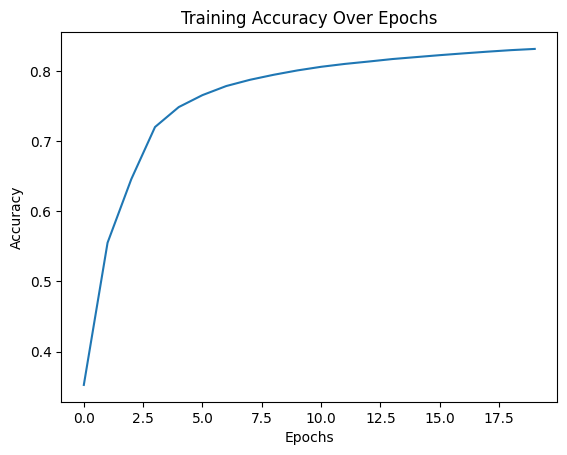

In [6]:
#构建模型
layer_sizes = [784, 128, 64, 10]
NN = NeuralNetwork(layer_sizes,activation='sigmoid')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 四层神经网络+relu激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.314
iterations 200 accuracy 0.420
iterations 300 accuracy 0.462
iterations 400 accuracy 0.484
iterations 500 accuracy 0.498
iterations 600 accuracy 0.507
iterations 700 accuracy 0.515
iterations 800 accuracy 0.521
iterations 900 accuracy 0.560
iterations 1000 accuracy 0.573
iterations 1100 accuracy 0.581
iterations 1200 accuracy 0.587
iterations 1300 accuracy 0.591
iterations 1400 accuracy 0.596
iterations 1500 accuracy 0.600
iterations 1600 accuracy 0.603
iterations 1700 accuracy 0.605
iterations 1800 accuracy 0.608
iterations 1900 accuracy 0.610
iterations 2000 accuracy 0.612
test accuracy:0.613


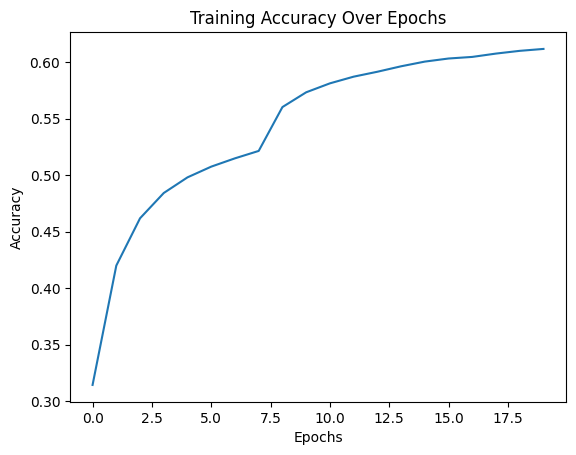

In [7]:
#构建模型
layer_sizes = [784, 128, 64, 10]
NN = NeuralNetwork(layer_sizes,activation='relu')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 四层神经网络+tanh激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.312
iterations 200 accuracy 0.427
iterations 300 accuracy 0.567
iterations 400 accuracy 0.631
iterations 500 accuracy 0.661
iterations 600 accuracy 0.711
iterations 700 accuracy 0.738
iterations 800 accuracy 0.752
iterations 900 accuracy 0.764
iterations 1000 accuracy 0.773
iterations 1100 accuracy 0.781
iterations 1200 accuracy 0.787
iterations 1300 accuracy 0.792
iterations 1400 accuracy 0.795
iterations 1500 accuracy 0.800
iterations 1600 accuracy 0.804
iterations 1700 accuracy 0.807
iterations 1800 accuracy 0.810
iterations 1900 accuracy 0.812
iterations 2000 accuracy 0.814
test accuracy:0.797


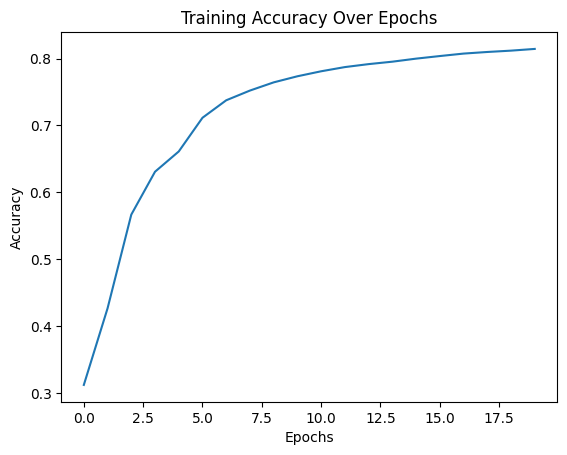

In [8]:
#构建模型
layer_sizes = [784, 128, 64, 10]
NN = NeuralNetwork(layer_sizes,activation='tanh')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 三层神经网络+relu激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.360
iterations 200 accuracy 0.464
iterations 300 accuracy 0.527
iterations 400 accuracy 0.565
iterations 500 accuracy 0.619
iterations 600 accuracy 0.647
iterations 700 accuracy 0.658
iterations 800 accuracy 0.664
iterations 900 accuracy 0.668
iterations 1000 accuracy 0.673
iterations 1100 accuracy 0.676
iterations 1200 accuracy 0.681
iterations 1300 accuracy 0.685
iterations 1400 accuracy 0.690
iterations 1500 accuracy 0.695
iterations 1600 accuracy 0.698
iterations 1700 accuracy 0.700
iterations 1800 accuracy 0.702
iterations 1900 accuracy 0.704
iterations 2000 accuracy 0.706
test accuracy:0.707


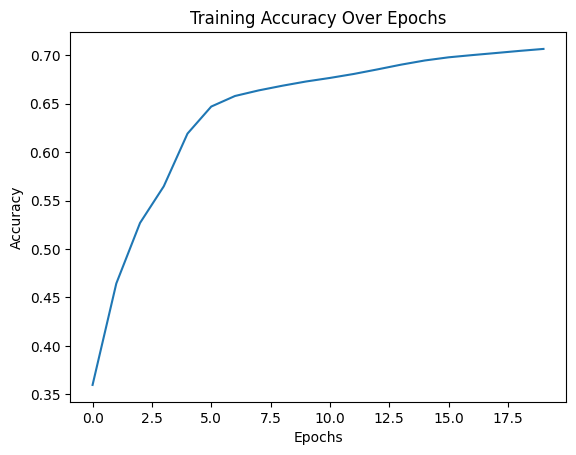

In [9]:
#构建模型
layer_sizes = [784, 128, 10]
NN = NeuralNetwork(layer_sizes,activation='relu')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 三层神经网络+tanh激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.325
iterations 200 accuracy 0.418
iterations 300 accuracy 0.455
iterations 400 accuracy 0.469
iterations 500 accuracy 0.476
iterations 600 accuracy 0.484
iterations 700 accuracy 0.506
iterations 800 accuracy 0.537
iterations 900 accuracy 0.546
iterations 1000 accuracy 0.551
iterations 1100 accuracy 0.554
iterations 1200 accuracy 0.559
iterations 1300 accuracy 0.564
iterations 1400 accuracy 0.571
iterations 1500 accuracy 0.582
iterations 1600 accuracy 0.595
iterations 1700 accuracy 0.610
iterations 1800 accuracy 0.624
iterations 1900 accuracy 0.638
iterations 2000 accuracy 0.652
test accuracy:0.659


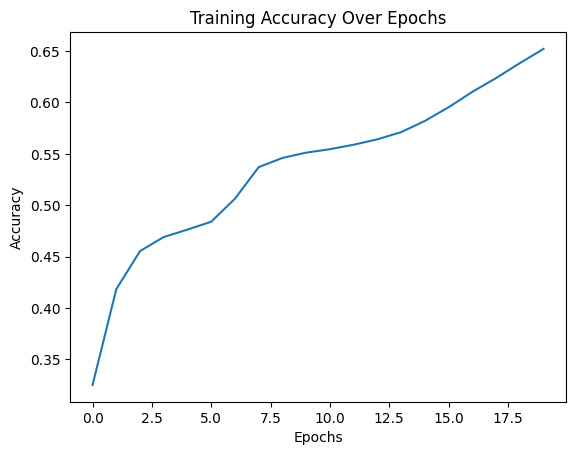

In [10]:
#构建模型
layer_sizes = [784, 128, 10]
NN = NeuralNetwork(layer_sizes,activation='tanh')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 五层神经网络+relu激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.236
iterations 200 accuracy 0.363
iterations 300 accuracy 0.439
iterations 400 accuracy 0.490
iterations 500 accuracy 0.526
iterations 600 accuracy 0.551
iterations 700 accuracy 0.569
iterations 800 accuracy 0.581
iterations 900 accuracy 0.589
iterations 1000 accuracy 0.597
iterations 1100 accuracy 0.601
iterations 1200 accuracy 0.606
iterations 1300 accuracy 0.608
iterations 1400 accuracy 0.611
iterations 1500 accuracy 0.614
iterations 1600 accuracy 0.615
iterations 1700 accuracy 0.616
iterations 1800 accuracy 0.619
iterations 1900 accuracy 0.620
iterations 2000 accuracy 0.621
test accuracy:0.630


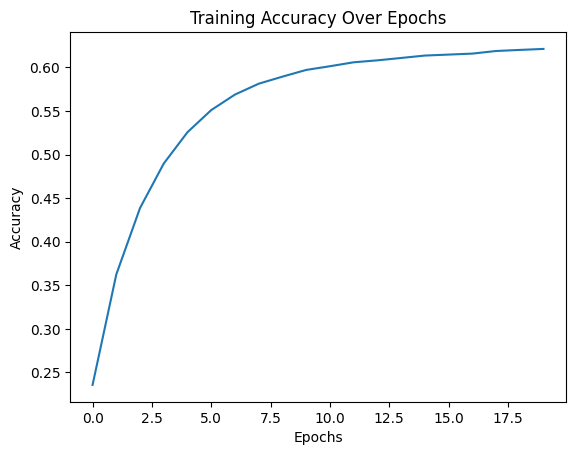

In [11]:
#构建模型
layer_sizes = [784, 128, 64 ,32, 10]
NN = NeuralNetwork(layer_sizes,activation='relu')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 五层神经网络+tanh激活函数

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.297
iterations 200 accuracy 0.444
iterations 300 accuracy 0.530
iterations 400 accuracy 0.581
iterations 500 accuracy 0.615
iterations 600 accuracy 0.638
iterations 700 accuracy 0.654
iterations 800 accuracy 0.667
iterations 900 accuracy 0.676
iterations 1000 accuracy 0.683
iterations 1100 accuracy 0.689
iterations 1200 accuracy 0.694
iterations 1300 accuracy 0.698
iterations 1400 accuracy 0.701
iterations 1500 accuracy 0.705
iterations 1600 accuracy 0.707
iterations 1700 accuracy 0.709
iterations 1800 accuracy 0.710
iterations 1900 accuracy 0.711
iterations 2000 accuracy 0.713
test accuracy:0.710


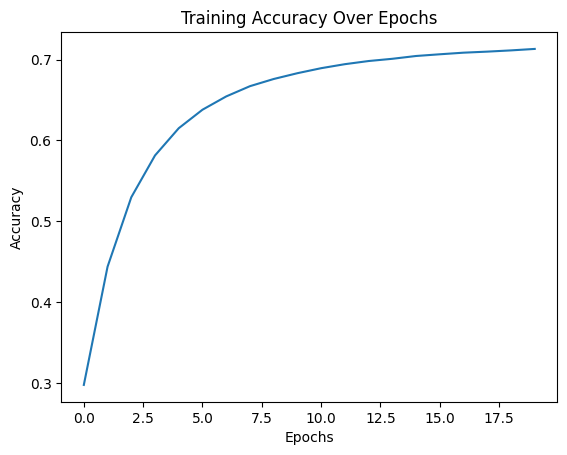

In [12]:
#构建模型
layer_sizes = [784, 128, 64 ,32, 10]
NN = NeuralNetwork(layer_sizes,activation='tanh')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=2000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## 测试是否神经层数影响训练批次，神经网络更复杂导致训练次数增加

C:\Users\Polo\AppData\Local\Temp\ipykernel_23808\2565785547.py:98: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


iterations 100 accuracy 0.249
iterations 200 accuracy 0.324
iterations 300 accuracy 0.380
iterations 400 accuracy 0.422
iterations 500 accuracy 0.455
iterations 600 accuracy 0.483
iterations 700 accuracy 0.503
iterations 800 accuracy 0.520
iterations 900 accuracy 0.534
iterations 1000 accuracy 0.545
iterations 1100 accuracy 0.554
iterations 1200 accuracy 0.562
iterations 1300 accuracy 0.568
iterations 1400 accuracy 0.574
iterations 1500 accuracy 0.580
iterations 1600 accuracy 0.584
iterations 1700 accuracy 0.588
iterations 1800 accuracy 0.591
iterations 1900 accuracy 0.595
iterations 2000 accuracy 0.598
iterations 2100 accuracy 0.599
iterations 2200 accuracy 0.601
iterations 2300 accuracy 0.603
iterations 2400 accuracy 0.604
iterations 2500 accuracy 0.606
iterations 2600 accuracy 0.608
iterations 2700 accuracy 0.609
iterations 2800 accuracy 0.610
iterations 2900 accuracy 0.612
iterations 3000 accuracy 0.612
iterations 3100 accuracy 0.614
iterations 3200 accuracy 0.615
iterations 3300 a

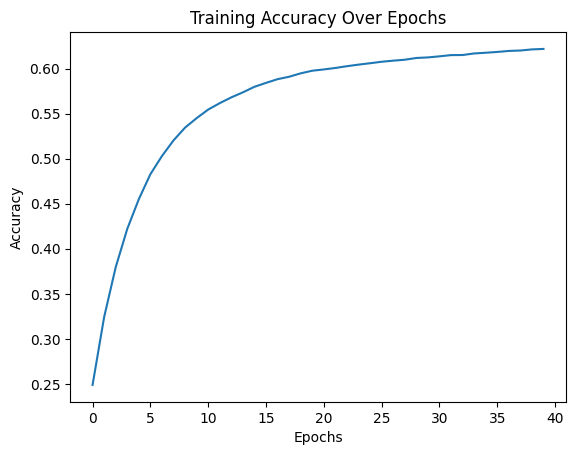

In [13]:
#构建模型
layer_sizes = [784, 128, 64 ,32, 10]
NN = NeuralNetwork(layer_sizes,activation='relu')
accuracy_history=NN.fit(train_x, train_y, learnrate=0.01, mini_batch_size=100,epochs=4000)
#测试
test_pred_labels = NN.predict(test_x)
acc = 0.0
for k in range(len(test_pred_labels)):
    if test_y[k,test_pred_labels[k]]==1.0:
        acc += 1.0
acc=acc/len(test_pred_labels)
print("test accuracy:%.3f"%(acc))
# 绘制准确率变化折线图
plt.plot(accuracy_history)
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()